In [169]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

In [170]:
I = 4
J = 5
F = 14

c = 10
b = 10
h = 1

dt = 0.0001
totstep = 3

In [171]:
def lorenz96(xy,i,j):
    #xy is oldxy, xy[0:I] is old x

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    return xy_dot

In [172]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]
    print('oldxy',oldxy)
    
    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    print("new",((k1 + 2*k2 + 2*k3 + k4)/6))
    #print(i,j)
    
    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [173]:
x = np.random.rand(I)
y = np.random.rand(J,I)
xylist = np.zeros([(totstep)*(I+J*I)])

print(x)
print()
print(y)
print()

newx=[]
newlist = []
time=[0]

for ii in range(I):
    xylist[ii] = x[ii]
    #newx.append(x[ii])

newx.append([x[ii] for ii in range(len(x))])
print()
print(newx)
print()

for jjj in range(J):
    for iii in range(I):
        xylist[I + jjj*I + iii] = y[jjj,iii]
#print(xylist)

[ 0.51744507  0.44477077  0.61790836  0.42710608]

[[  3.81446177e-01   1.49779147e-01   5.04191454e-01   4.35972716e-01]
 [  7.43247035e-01   3.07291871e-01   4.60522084e-01   5.72193675e-01]
 [  7.04687888e-01   7.77027113e-01   4.20551857e-01   4.52466275e-01]
 [  1.96629814e-01   5.64726718e-01   3.28043907e-01   7.27742244e-02]
 [  6.18351298e-01   2.70144577e-04   8.63922585e-01   9.71379765e-01]]


[[0.51744506752227915, 0.44477076984557995, 0.61790836403848715, 0.42710607749774299]]



In [174]:
for step in np.arange(1,totstep,1):
    
    xy_dot= np.zeros((I+J*I))

    for i in range(I):
        for j in range(J):
           
            xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step,i,j)
            
            newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I]
            
            print("rk new", xylist[(I+J*I)*(step):(I+J*I)*(step+1)])
            print(i,j)
        print('xy',xylist)
        #print(i+1,j+1)

        newx.append([newlist[ij] for ij in range(len(newlist))])
        #print(newx)
#print()   
#print(xylist)
# the new x is come out from previous y list, but during same time the new y time list is current by pervious x

oldxy [  5.17445068e-01   4.44770770e-01   6.17908364e-01   4.27106077e-01
   3.81446177e-01   1.49779147e-01   5.04191454e-01   4.35972716e-01
   7.43247035e-01   3.07291871e-01   4.60522084e-01   5.72193675e-01
   7.04687888e-01   7.77027113e-01   4.20551857e-01   4.52466275e-01
   1.96629814e-01   5.64726718e-01   3.28043907e-01   7.27742244e-02
   6.18351298e-01   2.70144577e-04   8.63922585e-01   9.71379765e-01]
new [ 0.00107642  0.          0.          0.         -0.0009714   0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
rk new [  5.18521492e-01   4.44770770e-01   6.17908364e-01   4.27106077e-01
   3.80474781e-01   1.49779147e-01   5.04191454e-01   4.35972716e-01
   7.43247035e-01   3.07291871e-01   4.60522084e-01   5.72193675e-01
   7.04687888e-01   7.77027113e-01   4.20551857e-01   4.52466275e-01
   1.96629814e-01   5.6

In [168]:
x1 = np.array([newx[a][0] for a in range(len(newx))])
x2 = np.array([newx[a][1] for a in range(len(newx))])
x3 = np.array([newx[a][2] for a in range(len(newx))])
x4 = np.array([newx[a][3] for a in range(len(newx))])

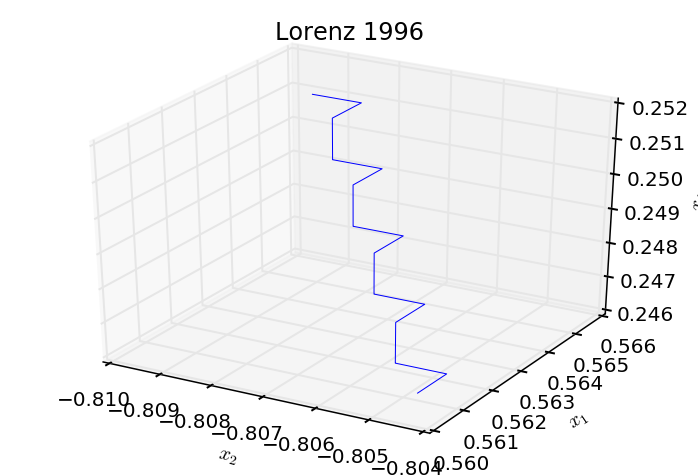

In [162]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(-x2[-3000000:-1], x1[-3000000:-1], x4[-3000000:-1],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_4$")
ax.set_title("Lorenz 1996")
plt.show()